In [1]:
#a regarder sur le cluster 
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/11/13 15:27:16 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
# le but de le faire sur hadoop
path  = "/Users/lydiapc/Desktop/TP1/docker-hadoop/Donnees/objets-trouves-restitution.csv"

In [4]:
df = spark.read.format("csv").option("header", "true").load(path,delimiter=';')

In [5]:
from pyspark.sql import functions as F

In [6]:
mylist = df.groupBy(["Nature d'objets"]).count()

In [7]:
mylist = mylist.orderBy('count', ascending=False)

In [8]:
mylist = mylist.withColumnRenamed("count","countTrouv")

In [9]:
mylist.show()

+--------------------+----------+
|     Nature d'objets|countTrouv|
+--------------------+----------+
|Porte-monnaie, po...|     68638|
|           Sac à dos|     61922|
|  Téléphone portable|     58858|
|Valise, sac sur r...|     51312|
|Manteau, veste, b...|     49050|
|Sac de voyage, sa...|     42730|
|    Clés, porte-clés|     31351|
|Carte d'identité,...|     28121|
|Sac d'enseigne (p...|     23656|
|            Lunettes|     23327|
|          Sac à main|     18403|
|     Carte de crédit|     16950|
|    Lunettes en étui|     16462|
|       Autres divers|     15178|
|Téléphone portabl...|     14077|
|     Bonnet, chapeau|     13281|
|    Foulard, écharpe|     12344|
|  Carte d'abonnement|     11820|
|Pièce d'identité ...|     10519|
|Autre pièce ou pa...|      9222|
+--------------------+----------+
only showing top 20 rows



In [ ]:
#on n'en a pas besoin
#mylist.write.format("csv").save("/Users/lydiapc/Desktop/TP1/docker-hadoop/Donnees/objets-trouves")

Visualiser les " dataFrame avec des Bar Empilés

In [10]:
mylist1 = mylist.take(10)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [12]:
df = pd.DataFrame (mylist1, columns = ['NatureObjet','countTrouv'])

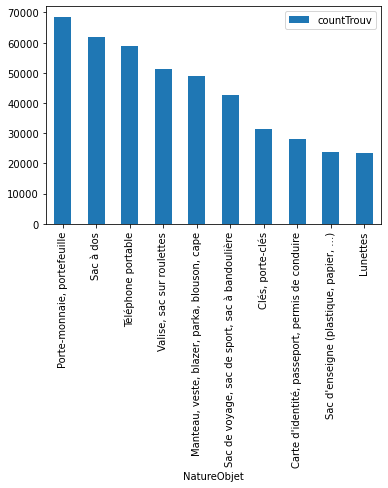

In [13]:
df.plot(x="NatureObjet",y="countTrouv",kind='bar') ; plt.show()

In [14]:
from pyspark.sql.functions import col

In [15]:
df1 = spark.read.format("csv").option("header", "true").load(path,delimiter=';')

In [16]:
df2objetResti = df1.filter(col("Date et heure de restitution").isNotNull())

In [17]:
mylistRest = df2objetResti.groupBy(["Nature d'objets"]).count()

In [18]:
mylistRest = mylistRest.orderBy('count', ascending=False)

In [19]:
mylistRest = mylistRest.withColumnRenamed("count","countRes")

In [20]:
mylistRest.count()

128

In [21]:
mylistRest.show()
#Un graphe pour voir la relation entre les objets restitué et les objets trouvés

+--------------------+--------+
|     Nature d'objets|countRes|
+--------------------+--------+
|Porte-monnaie, po...|   36163|
|Valise, sac sur r...|   32561|
|           Sac à dos|   31606|
|  Téléphone portable|   25227|
|Sac de voyage, sa...|   21807|
|Manteau, veste, b...|   12709|
|          Sac à main|   11026|
|Carte d'identité,...|    8192|
|Téléphone portabl...|    8119|
|Sac d'enseigne (p...|    6916|
|Ordinateur, ordin...|    5765|
|    Clés, porte-clés|    5438|
|Sacoche ventrale,...|    3585|
|       Autres divers|    2981|
|Sacoche pour ordi...|    2752|
|Pièce d'identité ...|    2504|
|     Autre bagagerie|    2483|
|    Lunettes en étui|    2470|
|     Carte de crédit|    2348|
|Tablette tactile ...|    2344|
+--------------------+--------+
only showing top 20 rows



In [ ]:
#OIn peut enlever
#mylistRest.write.format("csv").save("/Users/lydiapc/Desktop/TP1/docker-hadoop/Donnees/objets-restitue")

In [22]:
# Jointure entre les deux liste
myListJoined = mylistRest.join(mylist,["Nature d'objets"])

In [23]:
from pyspark.sql import functions as F

In [24]:
from pyspark.sql.types     import *
from pyspark.sql.functions import udf

@udf(returnType = FloatType())
def diff(colonRes,colonTrouv):
    return colonRes*100/colonTrouv

In [25]:
# le pourcentage d'objet restituées 
myListJoined=myListJoined.withColumn("Pourcentage",diff("countRes","countTrouv"))

In [26]:
myListJoined = myListJoined.orderBy('Pourcentage', ascending=False)

In [27]:
myListJoined.show()

+--------------------+--------+----------+-----------+
|     Nature d'objets|countRes|countTrouv|Pourcentage|
+--------------------+--------+----------+-----------+
|              Violon|     130|       166|  78.313255|
|Appareils respira...|     147|       200|       73.5|
|Ordinateur, ordin...|    2330|      3260|   71.47239|
|               Flûte|      38|        54|   70.37037|
|Ordinateur, ordin...|    5765|      8497|   67.84747|
|        Club de golf|      38|        58|   65.51724|
|Valise, sac sur r...|   32561|     51312|   63.45689|
|             Guitare|     462|       734|   62.94278|
|Autres instrument...|     501|       832|  60.216347|
|          Sac à main|   11026|     18403|  59.914143|
|Sacoche pour ordi...|    2752|      4672|   58.90411|
|Attaché-case, ser...|    2054|      3528|  58.219955|
|Sacoche ventrale,...|    3585|      6160|   58.19805|
|Téléphone portabl...|    8119|     14077|   57.67564|
|  Housse de vêtement|     243|       429|  56.643356|
|Porte-mon

In [28]:
# Le fichier qui contient les objets déclarés perdu
path1  = "/Users/lydiapc/Desktop/TP1/docker-hadoop/Donnees/objets-trouves-gares.csv"

In [29]:
df3 = spark.read.format("csv").option("header", "true").load(path1,delimiter=';')

In [30]:
df3.dtypes

[('Date de la déclaration de perte', 'string'),
 ('Gare', 'string'),
 ('Code UIC', 'string'),
 ("Nature d'objets", 'string'),
 ("Type d'objets", 'string'),
 ("Type d'enregistrement", 'string')]

In [31]:
mylistDec = df3.groupBy(["Nature d'objets"]).count()
mylistDec = mylistDec.orderBy('count', ascending=False)
mylistDec = mylistDec.withColumnRenamed("count","countDec")

In [32]:
mylistDec.show()

+--------------------+--------+
|     Nature d'objets|countDec|
+--------------------+--------+
|Porte-monnaie, po...|  136609|
|           Sac à dos|  113851|
|  Téléphone portable|  111741|
|Valise, sac sur r...|   96396|
|Manteau, veste, b...|   88029|
|Sac de voyage, sa...|   75146|
|    Clés, porte-clés|   57990|
|Carte d'identité,...|   49573|
|Sac d'enseigne (p...|   43331|
|       Autres divers|   43010|
|            Lunettes|   42941|
|    Lunettes en étui|   39667|
|          Sac à main|   36754|
|Téléphone portabl...|   35344|
|Ordinateur, ordin...|   30302|
|Autres appareils ...|   26369|
|     Bonnet, chapeau|   26291|
|  Carte d'abonnement|   22859|
|     Autre bagagerie|   20769|
|    Foulard, écharpe|   18782|
+--------------------+--------+
only showing top 20 rows



In [33]:
myListJoinedDecRes = mylistDec.join(mylist,["Nature d'objets"])

In [34]:
myListJoinedDecRes.show()
# Reste a voir comment visualiser tout ça

+--------------------+--------+----------+
|     Nature d'objets|countDec|countTrouv|
+--------------------+--------+----------+
|  Autres jeux/jouets|    1010|       510|
|Autres articles m...|    1933|       932|
|Autres articles d...|   14796|      3785|
|      Jeu de société|     338|       116|
|           Après-ski|      48|        13|
|Disque dur extern...|    7530|      1205|
|          Skateboard|    1641|       642|
|Attaché-case, ser...|    8750|      3528|
|    Pull over, gilet|   13353|      9049|
|           Sac à dos|  113851|     61922|
|       Autres bijoux|     981|       222|
|Porte-monnaie, po...|  136609|     68638|
|     Chemise à rabat|    5215|      1964|
|  Appareils auditifs|    1310|       246|
|Sac d'enseigne (p...|   43331|     23656|
|        Club de golf|     127|        58|
|  Téléphone portable|  111741|     58858|
|Pièce d'identité ...|   17784|     10519|
|  Housse de vêtement|     865|       429|
|Manteau, veste, b...|   88029|     49050|
+----------

#Transform the Date from a string to a timestamp (Date)
#Relation entre les declaration de perte et la régularité mensuelle

In [35]:
from pyspark.sql.functions import *
from pyspark.sql import Window
import pandas as pd


In [36]:
df4=df3.withColumn("Date_timestamp",to_timestamp(col("Date de la déclaration de perte"),"yyyy-MM-dd'T'HH:mm:ss"))

Pour ce traitemant on va d'abord se focaliser sur un mois précis et puis on va regarder les 
intervalles des horaires

In [37]:
df4 = df4.withColumn("year",year(col("Date_timestamp")))
df4 = df4.withColumn("month",month(col("Date_timestamp")))
df4 = df4.withColumn("hour",hour(col("Date_timestamp")))
df4 = df4.withColumn("minute",minute(col("Date_timestamp")))

In [38]:
donneAnneprecis = df4.where(col("year") == '2019')
donneMoisprecis = donneAnneprecis.where(col("month") == '5')

In [39]:
donneMoisprecis = donneMoisprecis.orderBy('hour','minute', ascending = True)

In [ ]:
#C'est pour voir le fichier resultat mais sinon y a pas besoin
#donneMoisprecis.write.format("csv").save("/Users/lydiapc/Desktop/TP1/docker-hadoop/Donnees/donneMoisprecis")

In [41]:

listInterval = []
listNumber = []
for i in range(22):
    a = donneMoisprecis.where(col("hour").between(i,i+2)).count()
    chaine = "["+str(i)+','+str(i+2)+"]"
    listInterval.append(chaine)
    listNumber.append(a)

In [42]:
MyDataMonth5 = pd.DataFrame(list(zip(listInterval,listNumber)), columns = ['Interval','Nombres'])

In [43]:
# Dans ce dataFrame on peut voir le nombre d'objet perdu entre diff intervalle de temps exemple entre 0h et 2h 
# on a 277 déclaration de perte 
MyDataMonth5

Interval  Nombres
0     [0,2]      277
1     [1,3]       99
2     [2,4]       59
3     [3,5]       46
4     [4,6]      107
5     [5,7]      312
6     [6,8]     1091
7     [7,9]     2250
8    [8,10]     3310
9    [9,11]     3749
10  [10,12]     3592
11  [11,13]     3344
12  [12,14]     3226
13  [13,15]     3264
14  [14,16]     3403
15  [15,17]     3436
16  [16,18]     3394
17  [17,19]     3258
18  [18,20]     2676
19  [19,21]     2105
20  [20,22]     1501
21  [21,23]     1232

In [44]:
# Le fichier qui contient la régularité mensuelle des trains
path2  = "/Users/lydiapc/Desktop/TP1/docker-hadoop/Donnees/regularite-mensuelle-intercites.csv"

In [45]:
trainsM = spark.read.format("csv").option("header", "true").load(path2,delimiter=';')

In [46]:
trainsM =trainsM.withColumn("date_timestamp",to_timestamp(col("date"),"yyyy-MM"))

In [47]:
trainsM = trainsM.withColumn("year",year(col("date_timestamp")))
trainsM = trainsM.withColumn("month",month(col("date_timestamp")))

In [48]:
trainAnneprecis = trainsM.where(col("year") == '2019')

In [49]:
#trainAnneprecis.write.format("csv").save("/Users/lydiapc/Desktop/TP1/docker-hadoop/Donnees/trainMoisprecis")

In [50]:
# d'abord on doit transformé le taux_de_régularité de string vers numerique
trainAnneprecis = trainAnneprecis.withColumn("taux_de_regularite",col("taux_de_regularite").cast('float'))

In [51]:
# j'ai défini une fonction regul 
@udf(returnType = FloatType())
def regul(tauxRegul):
    return 100 - tauxRegul

In [52]:
mydataTrain = trainAnneprecis.groupBy('month').agg(avg('taux_de_regularite').alias('taux_de_perturbation')).orderBy('taux_de_perturbation')

In [53]:
mydataTrain.withColumn("taux_de_perturbation",regul("taux_de_perturbation")).show()
# Le tableau se lit de la la maniére suivante : le mois de juin 21% des trains sont perturbé
# le tableau represent le taux de régularité des mois pour l'année 2019

+-----+--------------------+
|month|taux_de_perturbation|
+-----+--------------------+
|    6|            21.69943|
|   12|           19.657194|
|   11|           16.880238|
|   10|           15.492771|
|    7|           15.417224|
|    5|           15.004731|
|    4|           13.990485|
|    2|           13.167598|
|    8|           12.752556|
|    9|           11.183982|
|    3|           10.789621|
|    1|           10.631839|
+-----+--------------------+



In [54]:
# Ici je vais comparer la régularité des trains par rapport au nombre d'objet déclaré perdu par mois
# df5 contient les objets déclaré perdu pendant l'année 2019
df5 = donneAnneprecis
df5.groupBy('month').count().orderBy('count').show()
#le tableau ci dessous se lit de la maniére suivante: en mois de juin presque 17k objets on ete déclaré perdu
# Le but est de faire un graphe d'evolution de deux lignes pour comparer entre les mois 
# et cela entre les dataframe df5 et mydataTrain

+-----+-----+
|month|count|
+-----+-----+
|   12| 7603|
|    2|14186|
|   11|15263|
|    3|15330|
|    5|15733|
|    1|15800|
|    8|16130|
|    4|16262|
|   10|16569|
|    9|16736|
|    6|16978|
|    7|18476|
+-----+-----+



In [ ]:
# Reste a bien visualiser tous ça et tous mettre dans une petite présenation et tout ordonner sur un Git 